In [7]:
from classes.data_loader import DataLoader
from classes.lasso_model import LassoModel
from tqdm import tqdm
from matplotlib import pyplot as plt

In [12]:
# long time to run
data = DataLoader("data/usa.csv")

KeyboardInterrupt: 

In [10]:
LAMBDA_VALUES = [0.001, 0.01, 0.1, 1, 10]
YEAR = 10000
validation_r2s = []
test_r2s = []
lambdas = []
models = []

for train_start in tqdm(range(19800101, 20000101 + 2 * YEAR, YEAR)):
    train_end = train_start + 10 * YEAR
    validate_start = train_end
    validate_end = validate_start + 5 * YEAR
    test_start = validate_end
    test_end = test_start + YEAR

    # let validation choose the best lambda from grid search
    best_model, best_r2, best_lambda = LassoModel.validate(data, train_start, train_end, validate_start, validate_end, LAMBDA_VALUES)
    validation_r2s.append(best_r2)
    lambdas.append(best_lambda)
    models.append(best_model)

    # testing on an extra year of data
    test_r2 = best_model.evaluate(test_start, test_end)
    test_r2s.extend(test_r2)                                                           


  0%|          | 0/22 [00:00<?, ?it/s]


NameError: name 'data' is not defined

In [9]:
# test_years = list(range(1996, 2018))

test_months = [year*100 + month for year in range(1996, 2019) for month in range(1, 13)]
print(test_months)

plt.figure(figsize=(10, 5))
plt.plot(test_months, test_r2s, label="R^2 on test year")
plt.plot(test_months, validation_r2s, label="R^2 in validation years")
plt.xlabel('Date (YYYYMM)')
plt.ylabel('R^2 Score')
plt.legend()
plt.show()

[199601, 199602, 199603, 199604, 199605, 199606, 199607, 199608, 199609, 199610, 199611, 199612, 199701, 199702, 199703, 199704, 199705, 199706, 199707, 199708, 199709, 199710, 199711, 199712, 199801, 199802, 199803, 199804, 199805, 199806, 199807, 199808, 199809, 199810, 199811, 199812, 199901, 199902, 199903, 199904, 199905, 199906, 199907, 199908, 199909, 199910, 199911, 199912, 200001, 200002, 200003, 200004, 200005, 200006, 200007, 200008, 200009, 200010, 200011, 200012, 200101, 200102, 200103, 200104, 200105, 200106, 200107, 200108, 200109, 200110, 200111, 200112, 200201, 200202, 200203, 200204, 200205, 200206, 200207, 200208, 200209, 200210, 200211, 200212, 200301, 200302, 200303, 200304, 200305, 200306, 200307, 200308, 200309, 200310, 200311, 200312, 200401, 200402, 200403, 200404, 200405, 200406, 200407, 200408, 200409, 200410, 200411, 200412, 200501, 200502, 200503, 200504, 200505, 200506, 200507, 200508, 200509, 200510, 200511, 200512, 200601, 200602, 200603, 200604, 200605,

NameError: name 'test_r2s' is not defined

<Figure size 1000x500 with 0 Axes>

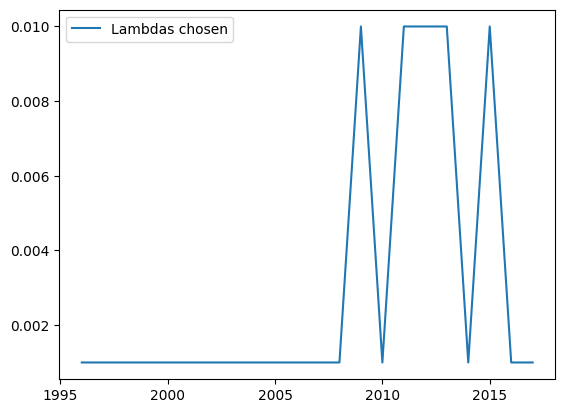

In [10]:
pyplot.plot(test_years, lambdas, label="Lambdas chosen")
pyplot.legend()
pyplot.show()